## Introduction

In this notebook we show simple examples of vector geometry using the Julia library [LazySets.jl](https://github.com/JuliaReach/LazySets.jl/).

In [7]:
using LazySets, ModelingToolkit, Plots

- [Planes](#Planes)
- [Linear constraints](#Linear-constraints) 
- [Lines](#Lines) 
- [Line segments](#Line-segments)
- [Vectors](#Vectors)
- [Intersections](#Intersections)

## Planes

Consider the set $H \subseteq \mathbb{R}^2$ defined as

  
$$
H = \{ (x, y) \in \mathbb{R}^{2} : x = y \}
$$

$H$ is a hyperplane (also a line if we are in two-dimensions, but we'll discuss lines in another section).

To represent this set we first create symbolic variables $x$ and $y$ that are used to conveniently define the set.

In [17]:
var = @variables x y

(x, y)

In [76]:
H = Hyperplane(x == y, var)

Hyperplane{Float64,Array{Float64,1}}([1.0, -1.0], -0.0)

The hyperplane is created passing the expression to the `Hyperplane` constructor, which receives an (optional) second argument that specifies the working variables, in this case $x$ and $y$, in that order.

Note that the symbolic relation passed to the `Hyperplane` construct can be equivalently written as

In [77]:
Hyperplane(x - y == 0, var)

Hyperplane{Float64,Array{Float64,1}}([1.0, -1.0], -0.0)

In either case, hyperplanes are internally represented as $a^T x = b$ where $a \in \mathbb{R}^n$ is normal to the hyperplane and $b \in \mathbb{R}$ is the hyperplane's displacement with respect to the origin.

In [78]:
dump(H)

Hyperplane{Float64,Array{Float64,1}}
  a: Array{Float64}((2,)) [1.0, -1.0]
  b: Float64 -0.0


Now let's define the hyperplane $x = - y$ and plot both sets on the $xy$ plane:

In [79]:
H′ = Hyperplane(x == -y, var)

Hyperplane{Float64,Array{Float64,1}}([1.0, 1.0], -0.0)

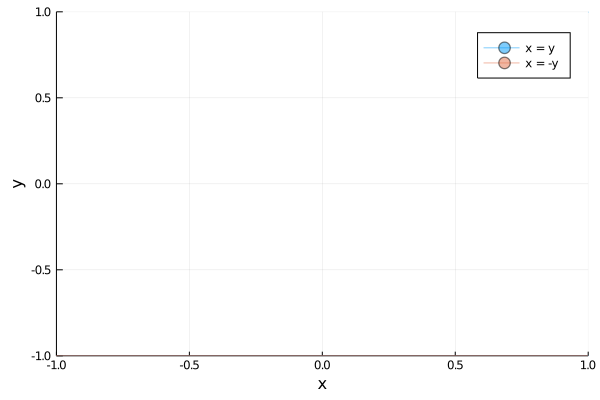

In [80]:
plot(H, xlab="x", ylab="y", lab="x = y")
plot!(H′, lab="x = -y")

Higher dimensional hyperplanes can be constructed similarly. If you work with many variables it is sometimes convenient to use the array notation together with the `@variables` macro. For instance, below we define the hyperplane
    
$$
H := \{ u \in \mathbb{R}^{10} : u_1 - u_3 = 2(u_2 - u_{10}) - 1.0\}
$$

In [81]:
@variables u[1:10]

(Operation[u₁, u₂, u₃, u₄, u₅, u₆, u₇, u₈, u₉, u₁₀],)

In [82]:
H = Hyperplane(u[1] - u[3] == 2*(u[2] - u[10]) - 1.0, u)

Hyperplane{Float64,Array{Float64,1}}([1.0, -2.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0], -1.0)

## Linear constraints

Linear constraints are sets defined by the relation $a^T x \leq b$. We call such sets `HalfSpaces`.

Below we build two half-spaces,

- $S := \{ (x, y) \in \mathbb{R}^2 : x \leq y \}$
- $S' := \{ (x, y) \in \mathbb{R}^2 : x \geq y \}$

In [42]:
S = HalfSpace(x <= y, var)
S′ = HalfSpace(x >= y, var)

HalfSpace{Float64,Array{Float64,1}}([1.0, 1.0], -0.0)

Note that you can define the relation with any of $\leq$, $\geq$ and strict inequalities are converted to non-strict ones. As shown previously for `Hyperplane`, symbolic variables and scalars can appear both in the left and in the right hand side of the expression.

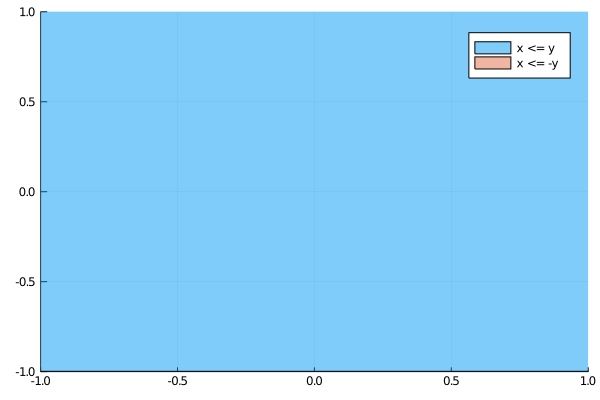

In [43]:
plot(S, lab="x <= y")
plot!(S′, lab="x <= -y")

Higher dimensional half-spaces can be constructed similarly. For example, the set
    
$$
S := \left\{ u \in \mathbb{R}^{10} : \sum_{i=1}^{10} u_i \leq 1 \right\}
$$
can be defined in the following way, using Julia's `sum` function.

In [83]:
S = HalfSpace(sum(u) ≤ 1, u)

HalfSpace{Float64,Array{Float64,1}}([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 1.0)

For expressions that involve only a subset of variables, we can use array slicing. For instance, the set
    
$$
T = \left\{ u \in \mathbb{R}^{10} : \sum_{i=1}^{5} u_i - 2\sum_{i=6}^{10} u_i \leq 1 \right\}
$$

In [86]:
S = HalfSpace(sum(u[1:5]) - 2*sum(u[6:10]) ≤ 1, u)

HalfSpace{Float64,Array{Float64,1}}([1.0, 1.0, 1.0, 1.0, 1.0, -2.0, -2.0, -2.0, -2.0, -2.0], 1.0)

## Lines

Lines can be defined using the `Line` set type. There are two ways of defining lines:

(i) Passing a point and the direction vector.

(ii) Passing two points of the line.

Below we show examples of both cases.

(i) Constructing a line passing a point and the direction vector.

Consider the line that passes through the point $(0, 1)$ and has direction parallel to the line $x = y$.

In [106]:
L1 = Line([0.0, 1.0], [1.0, 1.0])

Line{Float64,Array{Float64,1}}([0.0, 1.0], [1.0, 1.0])

(ii) Constructing a line given two points of the line.

The line `L1` passes through the points $(0, 1)$ and $(1, 2)$. We can use the keyword argument constructor to specify that the line should pass through both points.

In [107]:
L2 = Line(from=[0.0, 1.0], to=[1.0, 2.0])

Line{Float64,Array{Float64,1}}([0.0, 1.0], [-0.5, -0.5])

Now we plot both lines, and it is observed that the lines match.

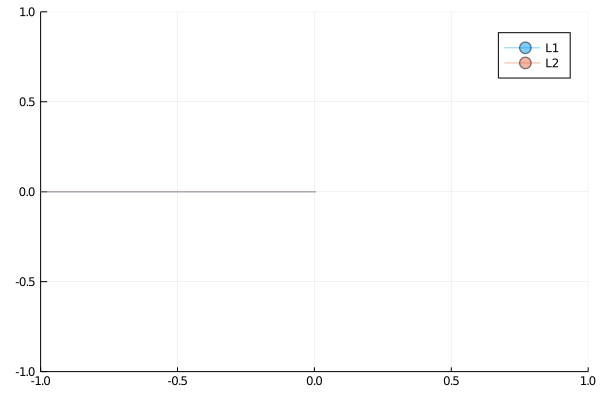

In [108]:
plot(L1, lab="L1")
plot!(L2, lab="L2")

We can check that the lines are equivalent using the `isequivalent` function:

In [109]:
isequivalent(L1, L2)

true

---

## Line segments

Line segments can be constructed passing each extreme point. 

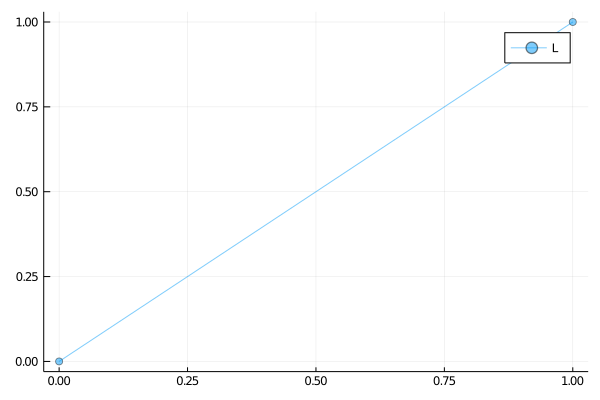

In [110]:
L = LineSegment([0.0, 0.0], [1.0, 1.0])

plot(L, lab="L")

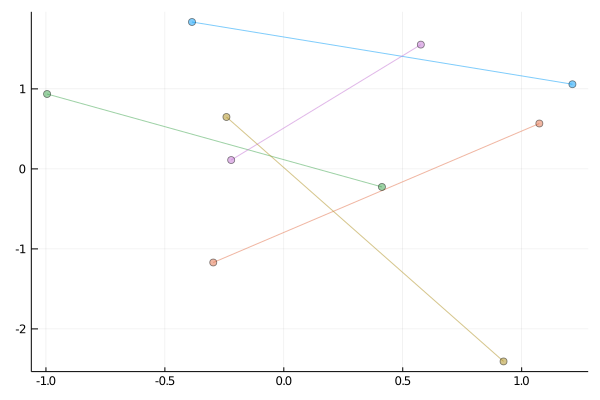

In [111]:
plot([rand(LineSegment) for _ in 1:5])

**To-do:** Currently, LazySets only implemnts two-dimensional line segments. It is planned to extend `LineSegment` to any dimension, and also define `LineSegment2D` with specialized methods for two-dimensions.

## Vectors

There is no set type for a "vector". LazySets uses Julia's built-in array set types. Other arrays (eg. static arrays, sparse arrays) can be used as well to define and work with LazySets types.

One idea to work with "vectors" as a lazyset is to see them as a special case of line segments. The plot recipe can be adapted to display an arrow in one end.

## Intersections

Intersections between set types can be computed with the function `intersection`. 

*Note.* For more advanced use cases, there is a lazy intersection operation, `Intersection`.

Our second example is to compute the intersection between the hyperplane $H = \{(x, y) \in \mathbb{R}^2 : x = y\}$ and the line segment $L = \{ p \in \mathbb{R}^2 : p = \lambda (b - a) + a,~~\lambda \in [0, 1]\}$, where $a = (0, -0.5)$ and $b = (0, 1)$. The solution is the origin, $(0, 0)$.

In [72]:
L1 = LineSegment([0.0, -0.5], [0.0, 1.0])
L2 = LineSegment([-0.5, 0.5], [0.5, 0.0])

LineSegment{Float64,Array{Float64,1}}([-0.5, 0.5], [0.5, 0.0])

In [74]:
Y = intersection(L1, L2)

Singleton{Float64,Array{Float64,1}}([0.0, 0.25])

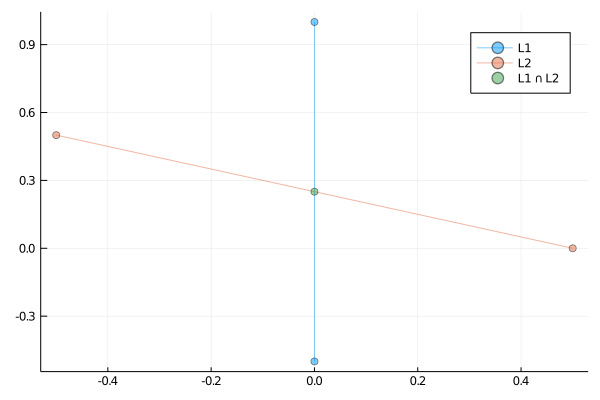

In [75]:
plot(L1, lab="L1")
plot!(L2, lab="L2")
plot!(Y, lab="L1 ∩ L2")

---

Our second example is to compute the intersection between the hyperplane $H = \{(x, y) \in \mathbb{R}^2 : x = y\}$ and the line segment $L = \{ p \in \mathbb{R}^2 : p = \lambda (b - a) + a,~~\lambda \in [0, 1]\}$, where $a = (0, -0.5)$ and $b = (0, 1)$. The solution is the origin, $(0, 0)$.

In [63]:
H = Hyperplane(x == y, var)

Hyperplane{Float64,Array{Float64,1}}([1.0, -1.0], -0.0)

In [64]:
L = LineSegment([0.0, -0.5], [0.0, 1.0])

LineSegment{Float64,Array{Float64,1}}([0.0, -0.5], [0.0, 1.0])

In [65]:
Y = intersection(H, L)

HPolytope{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([1.0, -1.0], -0.0), HalfSpace{Float64,Array{Float64,1}}([-1.0, 1.0], 0.0), HalfSpace{Float64,Array{Float64,1}}([1.5, 0.0], 0.0), HalfSpace{Float64,Array{Float64,1}}([-1.5, 0.0], 0.0)])

In [67]:
vertices_list(Y)

1-element Array{Array{Float64,1},1}:
 [0.0, 0.0]

**To-Do:** Specialize method for 2d line segment intersection with 2d hyperplane.

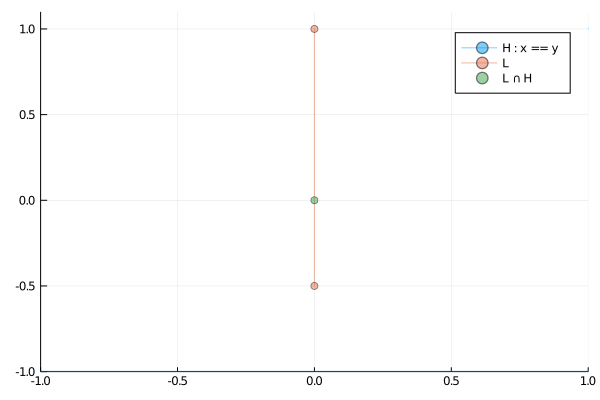

In [69]:
plot(H, lab="H : x == y")
plot!(L, lab="L")
plot!(Y, lab="L ∩ H")

## Dot product

## Cross product